In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import codecs
import re
import os.path

import re
import unicodedata
import string
from nltk.corpus import stopwords

from wordcloud import WordCloud

from collections import Counter

from sklearn.feature_extraction import text

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import numpy as np
import sklearn.naive_bayes as nb
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

#### Functions load files

In [3]:
def load_movies(path2data): # 1 classe par répertoire
    alltxts = [] # init vide
    labs = []
    cpt = 0
    for cl in os.listdir(path2data): # parcours des fichiers d'un répertoire
        for f in os.listdir(path2data+cl):
            txt = open(path2data+cl+'/'+f).read()
            alltxts.append(txt)
            labs.append(cpt)
        cpt+=1 # chg répertoire = cht classe
        
    return alltxts,labs

#### Init and show files

In [4]:
path = "./movies1000/"

X_movies,y_movies = load_movies(path)

In [5]:
path = "./testSentiment.txt"
f = open(path,encoding="utf8")
X_test_sentiments = np.array(f.readlines())

In [6]:
print(len(X_movies),len(y_movies))
print(X_movies[0])
print(y_movies[0])
print("\n#######################################\n\n")
print(X_movies[-1])
print(y_movies[-1])

2000 2000
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience member , 

In [7]:
print(len(X_test_sentiments))
print(X_test_sentiments[0])
print("\n")
print(X_test_sentiments[-1])

25000
Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly.



This is one of the dumbest films, I've ever seen. It rips off nearly ever type of thriller and manages to make a mess of them all.<br /><br />There's not a single good line or character in the whole mess. If there was a plot, it was an afterthought and as far as acting goes, there's nothing good to say so Ill say nothing. I honestly 

In [8]:
vectorizer = CountVectorizer()
X_transform_movies = vectorizer.fit_transform(X_movies)
mots_uniques = vectorizer.get_feature_names()
print('Nombre de mots uniques =>',len(vectorizer.get_feature_names()))

Nombre de mots uniques => 39659


# Analyse

In [9]:
nb_occurs = np.sum(X_transform_movies.toarray(), axis=0)
counter = Counter( { mots_uniques[i] : nb_occurs[i] for i in range(len(mots_uniques)) } )
counter.most_common(100)

[('the', 76529),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ('is', 25195),
 ('in', 21822),
 ('it', 16107),
 ('that', 15924),
 ('as', 11378),
 ('with', 10792),
 ('for', 9961),
 ('his', 9587),
 ('this', 9578),
 ('film', 9517),
 ('he', 8864),
 ('but', 8634),
 ('on', 7385),
 ('are', 6949),
 ('by', 6261),
 ('be', 6174),
 ('one', 5852),
 ('movie', 5771),
 ('an', 5744),
 ('who', 5692),
 ('not', 5577),
 ('you', 5316),
 ('from', 4999),
 ('at', 4986),
 ('was', 4940),
 ('have', 4901),
 ('they', 4825),
 ('has', 4719),
 ('her', 4522),
 ('all', 4373),
 ('there', 3770),
 ('like', 3690),
 ('so', 3683),
 ('out', 3637),
 ('about', 3523),
 ('up', 3405),
 ('more', 3347),
 ('what', 3322),
 ('when', 3258),
 ('which', 3161),
 ('or', 3148),
 ('she', 3141),
 ('their', 3122),
 ('some', 2985),
 ('just', 2905),
 ('can', 2882),
 ('if', 2799),
 ('we', 2775),
 ('him', 2633),
 ('into', 2623),
 ('even', 2565),
 ('only', 2495),
 ('than', 2474),
 ('no', 2472),
 ('good', 2411),
 ('time', 2411),
 ('most', 2306),
 (

On constate directement que les mots les plus presents sont des stopwords, nous allons voir plus tard s'il est mieux de les enlever.

Essayons de voir a quoi ressemble les donnees positives et negatives separement

In [10]:
movies_pos = []
movies_neg = []
for i in range(len(y_movies)):
    if y_movies[i] == 1:
        movies_pos.append(X_movies[i])
    else:
        movies_neg.append(X_movies[i])

### Movies Positives

In [11]:
txt_pos = ' '.join(movies_pos)

In [12]:
wordcloud_pos = WordCloud(background_color = 'white').generate(txt_pos)

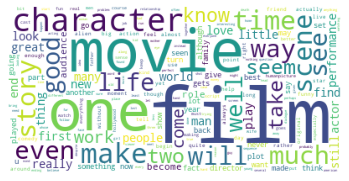

In [13]:
plt.figure()
#plt.title("WordCloud des movies positives sans supression des similar most commons")
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.savefig('fig1.png')
plt.show();

### Movies Negatives

In [14]:
txt_neg = ' '.join(movies_neg)

In [15]:
wordcloud_neg = WordCloud(background_color = 'black').generate(txt_neg)

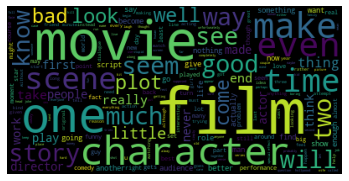

In [16]:
plt.figure()
#plt.title("WordCloud des movies negatives sans supression des similar most commons")
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.savefig('fig2.png')
plt.show();

On s'apercoit ici que dans les deux cas les mots les plus frequents sont similaires.
Il s'agit en plus de mot relatif au vocabulaire du cinema et non en rapport avec le sentiments de l'utilisateur

Mais aussi, on voit clairement les stopwords sont bien trop presents, via le most_common sur tout le dataset.

Essayons de voir ce qui se passe si nous enlevons les 25 mots communs les plus recurrents

### Supression des stopwords et des mots en communs (20 plus recurrents)

In [17]:
movies_posSW = []
movies_negSW = []
for i in range(len(y_movies)):
    if y_movies[i] == 1:
        movies_posSW.append(X_movies[i])
    else:
        movies_negSW.append(X_movies[i])

#### Movies Positives

In [18]:
vectorizerPos = CountVectorizer(stop_words='english')
transform_movies_pos = vectorizerPos.fit_transform(movies_pos)
mots_uniques_pos = vectorizerPos.get_feature_names()
print('Nombre de mots uniques pos =>',len(vectorizerPos.get_feature_names()))

Nombre de mots uniques pos => 30021


In [19]:
nb_occurs_pos = np.sum(transform_movies_pos.toarray(), axis=0)
counterPos = Counter( { mots_uniques_pos[i] : nb_occurs_pos[i] for i in range(len(mots_uniques_pos)) } )
counterPos.most_common(50)

[('film', 5230),
 ('movie', 2525),
 ('like', 1802),
 ('just', 1342),
 ('good', 1248),
 ('story', 1246),
 ('time', 1243),
 ('character', 1078),
 ('life', 1057),
 ('characters', 986),
 ('way', 929),
 ('films', 884),
 ('does', 866),
 ('best', 829),
 ('make', 791),
 ('people', 789),
 ('really', 777),
 ('little', 775),
 ('man', 764),
 ('great', 751),
 ('scene', 727),
 ('new', 723),
 ('world', 665),
 ('love', 661),
 ('scenes', 638),
 ('movies', 635),
 ('doesn', 602),
 ('plot', 596),
 ('director', 586),
 ('don', 576),
 ('know', 572),
 ('makes', 561),
 ('performance', 549),
 ('seen', 541),
 ('end', 531),
 ('action', 520),
 ('work', 520),
 ('role', 488),
 ('years', 488),
 ('real', 485),
 ('year', 485),
 ('big', 467),
 ('old', 463),
 ('right', 454),
 ('things', 451),
 ('john', 448),
 ('audience', 444),
 ('star', 444),
 ('young', 439),
 ('family', 434)]

#### Movies Negatives

In [20]:
vectorizerNeg = CountVectorizer(stop_words='english')
transform_movies_neg = vectorizerNeg.fit_transform(movies_neg)
mots_uniques_neg = vectorizerNeg.get_feature_names()
print('Nombre de mots uniques neg =>',len(vectorizerNeg.get_feature_names()))

Nombre de mots uniques neg => 28084


In [21]:
nb_occurs_neg = np.sum(transform_movies_neg.toarray(), axis=0)
counterNeg = Counter( { mots_uniques_neg[i] : nb_occurs_neg[i] for i in range(len(mots_uniques_neg)) } )
counterNeg.most_common(50)

[('film', 4287),
 ('movie', 3246),
 ('like', 1888),
 ('just', 1563),
 ('time', 1168),
 ('good', 1163),
 ('bad', 1034),
 ('character', 942),
 ('story', 923),
 ('plot', 917),
 ('characters', 873),
 ('make', 851),
 ('really', 781),
 ('way', 764),
 ('little', 726),
 ('don', 718),
 ('does', 702),
 ('doesn', 675),
 ('scene', 670),
 ('people', 666),
 ('action', 652),
 ('films', 652),
 ('director', 651),
 ('know', 645),
 ('scenes', 636),
 ('man', 632),
 ('big', 597),
 ('movies', 571),
 ('new', 569),
 ('better', 531),
 ('end', 531),
 ('life', 529),
 ('best', 504),
 ('work', 500),
 ('isn', 491),
 ('script', 478),
 ('audience', 470),
 ('going', 470),
 ('think', 459),
 ('love', 458),
 ('funny', 451),
 ('thing', 448),
 ('gets', 442),
 ('actually', 439),
 ('look', 437),
 ('makes', 431),
 ('comedy', 430),
 ('real', 430),
 ('did', 422),
 ('long', 415)]

In [22]:
def remove_same(nb_remove,t1,t2):
    """
    Renvoie la liste des mots en communs entre t1 et t2, dans le vocabulaire de leur nb_remove plus recurrents.
    """
    t1_values = []
    t2_values = []
    for i in t1.most_common(nb_remove):
         t1_values.append(i[0])
    for i in t2.most_common(nb_remove):
         t2_values.append(i[0])
            
    common = list(set(t1_values).intersection(t2_values))
    return common
    #text.ENGLISH_STOP_WORDS.union(additional_stop_words)

In [23]:
removeWords = remove_same(25,counterPos,counterNeg)

In [24]:
removeWords

['way',
 'time',
 'people',
 'movie',
 'film',
 'character',
 'scenes',
 'really',
 'scene',
 'does',
 'films',
 'good',
 'like',
 'make',
 'characters',
 'story',
 'just',
 'little']

In [25]:
stopsWordsUP = text.ENGLISH_STOP_WORDS.union(removeWords)

In [26]:
wordcloud_pos = WordCloud(background_color = 'white', stopwords=stopsWordsUP).generate(txt_pos)

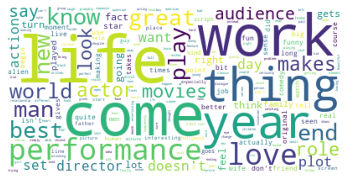

In [27]:
plt.figure()
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.savefig('posSW.png')
plt.show();

In [28]:
wordcloud_neg = WordCloud(background_color = 'black', stopwords=stopsWordsUP).generate(txt_neg)

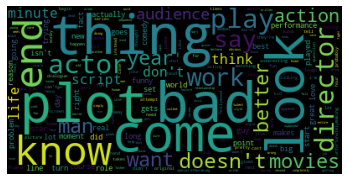

In [29]:
plt.figure()
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.savefig('negSW.png')
plt.show();

Ici on voit qu'on a une representation des mots qui est plus representative des classes surtout pour les negatives

Les majuscules ne sont pas necessaires car certes de maniere generale on peut penser que les personnes mecontentent s'exprimer avec des mots forts et donc en MAJUSCULES. Sauf qu'ici c'est surtout la recherche des termes negatives et positives qui nous interesse donc le fait d'avoir le memes mot en minuscule ou maj n'a pas d'interet. C'est le sens des mots et leur signification et non leur syntaxe qui va nous aider a determiner le sentiment.

Un aspect qui pour le coup peut etre interessant c'est la lemmanisation surtout pour la negation car avec du bi-grammes on aura le <'t> qui pourra surement donc nous aider a realiser une meilleure prediction.

La racinisation n'est clairement pas une bonne idee car celui-ci va donc mettre les mots a leurs forme initiales donc nous n'allons plus avoir la forme negative des mots, ce qui va donc empecher de distinguer les deux classes.

#### Function to transform the text

In [30]:
def transform(text, punc=False,accentMaj=False,nb=False, stopW=False) :
    text_transf = text
    
    for i in range(len(text)) :
        
        if punc:
            punc = string.punctuation  # recupération de la ponctuation
            punc += '\n\r\t'
            text_transf[i] = text_transf[i].translate(str.maketrans(punc, ' ' * len(punc)))  
        if accentMaj:
            # suppression des accents et des caractères non normalisés
            text_transf[i] = unicodedata.normalize('NFD', text_transf[i]).encode('ascii', 'ignore').decode("utf-8")
            text_transf[i] = text_transf[i].lower()
        
        if nb:
            # suppression des nombres
            text_transf[i] = re.sub('[0-9]+', '', text_transf[i]) # remplacer une séquence de chiffres par rien
        if stopW:
            for w in stopwords.words('english'):
                text_transf[i] = text_transf[i].replace(w, '') 
    return text_transf

#### All Vectorizer for all models

On va donc tester les modeles avec differentes transformation :
    <ul>
    <li>avec/sans stopWordUP</li>
    <li>1-gram car on a l'apostrophe qui est la plupart du temps present dans des mots negatives et de maniere generale le 1-gram marche bien comme dans la traduction donc a tester</li>
    <li>3-gram permettant la de peut-etre mettre en evidence les n't</li>
    </li>

In [31]:
vectorizerC_movies = CountVectorizer(max_features=10000)
vectorizerC_moviesSW = CountVectorizer(max_features=10000, stop_words=stopsWordsUP)
vectorizerC_movies1G = CountVectorizer(max_features=10000, ngram_range=(1,1))
vectorizerC_moviesSW1G = CountVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(1,1))
vectorizerC_movies2G = CountVectorizer(max_features=10000, ngram_range=(2,2))
vectorizerC_moviesSW2G = CountVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(2,2))
vectorizerC_movies12G = CountVectorizer(max_features=10000, ngram_range=(1,2))
vectorizerC_moviesSW12G = CountVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(1,2))
vectorizerC_movies13G = CountVectorizer(max_features=10000, ngram_range=(1,3))
vectorizerC_moviesSW13G = CountVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(1,3))
svc
vectorizerTFIDF_movies = TfidfVectorizer(max_features=10000)
vectorizerTFIDF_moviesSW = TfidfVectorizer(max_features=10000, stop_words=stopsWordsUP)
vectorizerTFIDF_movies1G = TfidfVectorizer(max_features=10000, ngram_range=(1,1))
vectorizerTFIDF_moviesSW1G = TfidfVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(1,1))
vectorizerTFIDF_movies2G = TfidfVectorizer(max_features=10000, ngram_range=(2,2))
vectorizerTFIDF_moviesSW2G = TfidfVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(2,2))
vectorizerTFIDF_movies12G = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
vectorizerTFIDF_moviesSW12G = TfidfVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(1,2))
vectorizerTFIDF_movies13G = TfidfVectorizer(max_features=10000, ngram_range=(1,3))
vectorizerTFIDF_moviesSW13G = TfidfVectorizer(max_features=10000, stop_words=stopsWordsUP, ngram_range=(1,3))

In [32]:
vectorizers = {'vectorizerC_movies' : vectorizerC_movies, 'vectorizerC_moviesSW' : vectorizerC_moviesSW,
               'vectorizerC_movies1G' : vectorizerC_movies1G, 'vectorizerC_moviesSW1G' : vectorizerC_moviesSW1G,
               'vectorizerC_movies2G' : vectorizerC_movies2G, 'vectorizerC_moviesSW2G' : vectorizerC_moviesSW2G,
               'vectorizerC_movies12G' : vectorizerC_movies12G, 'vectorizerC_moviesSW12G' : vectorizerC_moviesSW12G,
               'vectorizerC_movies13G' : vectorizerC_movies13G, 'vectorizerC_moviesSW13G' : vectorizerC_moviesSW13G,
               
               'vectorizerTFIDF_movies' : vectorizerTFIDF_movies, 'vectorizerTFIDF_moviesSW' : vectorizerTFIDF_moviesSW,
               'vectorizerTFIDF_movies1G' : vectorizerTFIDF_movies1G, 'vectorizerTFIDF_moviesSW1G' : vectorizerTFIDF_moviesSW1G,
               'vectorizerTFIDF_movies2G' : vectorizerTFIDF_movies2G, 'vectorizerTFIDF_moviesSW2G' : vectorizerTFIDF_moviesSW2G,
               'vectorizerTFIDF_movies12G' : vectorizerTFIDF_movies12G, 'vectorizerTFIDF_moviesSW12G' : vectorizerTFIDF_moviesSW12G,
               'vectorizerTFIDF_movies13G' : vectorizerTFIDF_movies13G, 'vectorizerTFIDF_moviesSW13G' : vectorizerTFIDF_moviesSW13G}

#### Models and their parameters

In [33]:
clf = nb.MultinomialNB()
svc = svm.LinearSVC()
lin = linear_model.LogisticRegression()

param_grid_clf = {'alpha': [0.1,0.2,0.25,0.5,0.75,0.8,1]}
param_grid_svc = {'max_iter':[10000,15000,20000,25000], 'C': [0,1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]}
param_grid_lin = {'max_iter':[3000,5000,10000,15000,20000,25000]}

In [34]:
#all_models = {clf:param_grid_clf, lin:param_grid_lin}
all_models = {clf:param_grid_clf, svc:param_grid_svc, lin:param_grid_lin}

#### Params for the Grid Search

In [35]:
accuracys = {}

for v in vectorizers:
    accuracys[v] = []

In [36]:
accuracys

{'vectorizerC_movies': [],
 'vectorizerC_moviesSW': [],
 'vectorizerC_movies1G': [],
 'vectorizerC_moviesSW1G': [],
 'vectorizerC_movies2G': [],
 'vectorizerC_moviesSW2G': [],
 'vectorizerC_movies12G': [],
 'vectorizerC_moviesSW12G': [],
 'vectorizerC_movies13G': [],
 'vectorizerC_moviesSW13G': [],
 'vectorizerTFIDF_movies': [],
 'vectorizerTFIDF_moviesSW': [],
 'vectorizerTFIDF_movies1G': [],
 'vectorizerTFIDF_moviesSW1G': [],
 'vectorizerTFIDF_movies2G': [],
 'vectorizerTFIDF_moviesSW2G': [],
 'vectorizerTFIDF_movies12G': [],
 'vectorizerTFIDF_moviesSW12G': [],
 'vectorizerTFIDF_movies13G': [],
 'vectorizerTFIDF_moviesSW13G': []}

In [37]:
X_movies_transform = transform(X_movies, punc=True, accentMaj=False, nb=True)

In [38]:
#import warnings
#warnings.simplefilter("ignore")


In [39]:
for vname in vectorizers:
    v = vectorizers[vname]
    
    print("Work on vectorizer => ",vname)
    vec_movies_train = v.fit_transform(X_movies_transform)
    for m in all_models:
        print("\tWith => ",m)
        grid_cv = GridSearchCV(m, all_models[m], n_jobs=-1, cv=5, scoring='f1')
        grid_cv.fit(vec_movies_train, y_movies)
        #print('Best score for', m, " => ", grid_cv.best_score_)
        #print('The parameters =>', grid_cv.best_params_)
        accuracys[vname].append((grid_cv.best_score_, grid_cv.best_params_))

Work on vectorizer =>  vectorizerC_movies
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.82589694 0.82589694
 0.82589694 0.82589694 0.8268903  0.8268903  0.8268903  0.8268903
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.8262544

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_moviesSW
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.82980457 0.82980457
 0.82980457 0.82980457 0.82924091 0.82924091 0.82924091 0.82924091
 0.82920525 0.82920525 0.82920525 0.82920525 0.82877943 0.82877943
 0.82877943 0.82877943 0.82877943 0.82877943 0.82877943 0.82877943
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.829378

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_movies1G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.82589694 0.82589694
 0.82589694 0.82589694 0.8268903  0.8268903  0.8268903  0.8268903
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448 0.82625448
 0.82625448 0.82625448 0.82625448 0.82625448 0.8262544

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_moviesSW1G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.82980457 0.82980457
 0.82980457 0.82980457 0.82924091 0.82924091 0.82924091 0.82924091
 0.82920525 0.82920525 0.82920525 0.82920525 0.82877943 0.82877943
 0.82877943 0.82877943 0.82877943 0.82877943 0.82877943 0.82877943
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875 0.82937875
 0.82937875 0.82937875 0.82937875 0.82937875 0.829378

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_movies2G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.79206264 0.79206264
 0.79206264 0.79206264 0.79127895 0.79127895 0.79127895 0.79127895
 0.79068793 0.79068793 0.79068793 0.79068793 0.78989562 0.78989562
 0.78989562 0.78989562 0.79091085 0.79091085 0.79091085 0.79091085
 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085
 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085
 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085
 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085
 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085
 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085
 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085
 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085 0.79091085
 0.79091085 0.79091085 0.79091085 0.79091085 0.790910

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_moviesSW2G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.71375437 0.71375437
 0.71375437 0.71375437 0.7140548  0.7140548  0.7140548  0.7140548
 0.71399451 0.71399451 0.71399451 0.71399451 0.7146223  0.7146223
 0.7146223  0.7146223  0.71425441 0.71425441 0.71425441 0.71425441
 0.71388839 0.71388839 0.71388839 0.71388839 0.71354561 0.71354561
 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561
 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561
 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561
 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561
 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561
 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561
 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561
 0.71354561 0.71354561 0.71354561 0.71354561 0.71354561

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_movies12G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.83762883 0.83762883
 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883
 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883
 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883
 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883
 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883
 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883
 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883
 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883
 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883
 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883
 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883 0.83762883
 0.83762883 0.83762883 0.83762883 0.83762883 0.837628

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_moviesSW12G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.83047036 0.83047036
 0.83047036 0.83047036 0.83047036 0.83047036 0.83047036 0.83047036
 0.83047036 0.83047036 0.83047036 0.83047036 0.83047036 0.83047036
 0.83047036 0.83047036 0.83088885 0.83088885 0.83088885 0.83088885
 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885
 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885
 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885
 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885
 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885
 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885
 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885
 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885 0.83088885
 0.83088885 0.83088885 0.83088885 0.83088885 0.830888

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_movies13G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.84002777 0.84002777
 0.84002777 0.84002777 0.84060533 0.84060533 0.84060533 0.84060533
 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533
 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533
 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533
 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533
 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533
 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533
 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533
 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533
 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533
 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533 0.84060533
 0.84060533 0.84060533 0.84060533 0.84060533 0.840605

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerC_moviesSW13G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.83102601 0.83102601
 0.83102601 0.83102601 0.83144859 0.83144859 0.83144859 0.83144859
 0.8316195  0.8316195  0.8316195  0.8316195  0.83203633 0.83203633
 0.83203633 0.83203633 0.83203633 0.83203633 0.83203633 0.83203633
 0.83203633 0.83203633 0.83203633 0.83203633 0.83203633 0.83203633
 0.83203633 0.83203633 0.83203633 0.83203633 0.83203633 0.83203633
 0.83203633 0.83203633 0.83203633 0.83203633 0.83203633 0.83203633
 0.83203633 0.83203633 0.83203633 0.83203633 0.83203633 0.83203633
 0.83203633 0.83203633 0.83203633 0.83203633 0.83203633 0.83203633
 0.83203633 0.83203633 0.83144004 0.83144004 0.83144004 0.83144004
 0.83144004 0.83144004 0.83144004 0.83144004 0.83144004 0.83144004
 0.83144004 0.83144004 0.83144004 0.83144004 0.83144004 0.83144004
 0.83144004 0.83144004 0.83144004 0.83144004 0.831440

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_movies
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.86238011 0.86238011
 0.86238011 0.86238011 0.86050109 0.86050109 0.86050109 0.86050109
 0.85640043 0.85640043 0.85640043 0.85640043 0.85440872 0.85440872
 0.85440872 0.85440872 0.85412514 0.85412514 0.85412514 0.85412514
 0.85181479 0.85181479 0.85181479 0.85181479 0.85167946 0.85167946
 0.85167946 0.85167946 0.84913084 0.84913084 0.84913084 0.84913084
 0.84971983 0.84971983 0.84971983 0.84971983 0.85030583 0.85030583
 0.85030583 0.85030583 0.85073086 0.85073086 0.85073086 0.85073086
 0.8512973  0.8512973  0.8512973  0.8512973  0.8512973  0.8512973
 0.8512973  0.8512973  0.85088058 0.85088058 0.85088058 0.85088058
 0.85088058 0.85088058 0.85088058 0.85088058 0.85102027 0.85102027
 0.85102027 0.85102027 0.85102027 0.85102027 0.85102027 0.85102027
 0.85102027 0.85102027 0.85102027 0.85102027 0.8510202

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_moviesSW
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.85343979 0.85343979
 0.85343979 0.85343979 0.84845203 0.84845203 0.84845203 0.84845203
 0.84534986 0.84534986 0.84534986 0.84534986 0.84453905 0.84453905
 0.84453905 0.84453905 0.84379445 0.84379445 0.84379445 0.84379445
 0.8400271  0.8400271  0.8400271  0.8400271  0.83986002 0.83986002
 0.83986002 0.83986002 0.83903647 0.83903647 0.83903647 0.83903647
 0.8386176  0.8386176  0.8386176  0.8386176  0.8382075  0.8382075
 0.8382075  0.8382075  0.83764529 0.83764529 0.83764529 0.83764529
 0.83764529 0.83764529 0.83764529 0.83764529 0.83764529 0.83764529
 0.83764529 0.83764529 0.8380554  0.8380554  0.8380554  0.8380554
 0.8380554  0.8380554  0.8380554  0.8380554  0.8380554  0.8380554
 0.8380554  0.8380554  0.8380554  0.8380554  0.8380554  0.8380554
 0.8380554  0.8380554  0.8380554  0.8380554  0.8380554  0

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_movies1G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.86238011 0.86238011
 0.86238011 0.86238011 0.86050109 0.86050109 0.86050109 0.86050109
 0.85640043 0.85640043 0.85640043 0.85640043 0.85440872 0.85440872
 0.85440872 0.85440872 0.85412514 0.85412514 0.85412514 0.85412514
 0.85181479 0.85181479 0.85181479 0.85181479 0.85167946 0.85167946
 0.85167946 0.85167946 0.84913084 0.84913084 0.84913084 0.84913084
 0.84971983 0.84971983 0.84971983 0.84971983 0.85030583 0.85030583
 0.85030583 0.85030583 0.85073086 0.85073086 0.85073086 0.85073086
 0.8512973  0.8512973  0.8512973  0.8512973  0.8512973  0.8512973
 0.8512973  0.8512973  0.85088058 0.85088058 0.85088058 0.85088058
 0.85088058 0.85088058 0.85088058 0.85088058 0.85102027 0.85102027
 0.85102027 0.85102027 0.85102027 0.85102027 0.85102027 0.85102027
 0.85102027 0.85102027 0.85102027 0.85102027 0.8510202

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_moviesSW1G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.85343979 0.85343979
 0.85343979 0.85343979 0.84845203 0.84845203 0.84845203 0.84845203
 0.84534986 0.84534986 0.84534986 0.84534986 0.84453905 0.84453905
 0.84453905 0.84453905 0.84379445 0.84379445 0.84379445 0.84379445
 0.8400271  0.8400271  0.8400271  0.8400271  0.83986002 0.83986002
 0.83986002 0.83986002 0.83903647 0.83903647 0.83903647 0.83903647
 0.8386176  0.8386176  0.8386176  0.8386176  0.8382075  0.8382075
 0.8382075  0.8382075  0.83764529 0.83764529 0.83764529 0.83764529
 0.83764529 0.83764529 0.83764529 0.83764529 0.83764529 0.83764529
 0.83764529 0.83764529 0.8380554  0.8380554  0.8380554  0.8380554
 0.8380554  0.8380554  0.8380554  0.8380554  0.8380554  0.8380554
 0.8380554  0.8380554  0.8380554  0.8380554  0.8380554  0.8380554
 0.8380554  0.8380554  0.8380554  0.8380554  0.8380554  0

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_movies2G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.82598935 0.82598935
 0.82598935 0.82598935 0.82148992 0.82148992 0.82148992 0.82148992
 0.81880148 0.81880148 0.81880148 0.81880148 0.81895159 0.81895159
 0.81895159 0.81895159 0.81775747 0.81775747 0.81775747 0.81775747
 0.81452459 0.81452459 0.81452459 0.81452459 0.81529538 0.81529538
 0.81529538 0.81529538 0.81488391 0.81488391 0.81488391 0.81488391
 0.81480904 0.81480904 0.81480904 0.81480904 0.81439721 0.81439721
 0.81439721 0.81439721 0.81498638 0.81498638 0.81498638 0.81498638
 0.81498638 0.81498638 0.81498638 0.81498638 0.81498638 0.81498638
 0.81498638 0.81498638 0.81498638 0.81498638 0.81498638 0.81498638
 0.81498638 0.81498638 0.81498638 0.81498638 0.81498638 0.81498638
 0.81498638 0.81498638 0.81498638 0.81498638 0.81498638 0.81498638
 0.81498638 0.81498638 0.81498638 0.81498638 0.814986

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_moviesSW2G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.74063976 0.74063976
 0.74063976 0.74063976 0.73605567 0.73605567 0.73605567 0.73605567
 0.73203821 0.73203821 0.73203821 0.73203821 0.73074255 0.73074255
 0.73074255 0.73074255 0.73176491 0.73176491 0.73176491 0.73176491
 0.73056771 0.73056771 0.73056771 0.73056771 0.73082096 0.73082096
 0.73082096 0.73082096 0.73019577 0.73019577 0.73019577 0.73019577
 0.72983123 0.72983123 0.72983123 0.72983123 0.72983123 0.72983123
 0.72983123 0.72983123 0.72918822 0.72918822 0.72918822 0.72918822
 0.72791367 0.72791367 0.72791367 0.72791367 0.72791367 0.72791367
 0.72791367 0.72791367 0.72791367 0.72791367 0.72791367 0.72791367
 0.72791367 0.72791367 0.72791367 0.72791367 0.72791367 0.72791367
 0.72791367 0.72791367 0.72791367 0.72791367 0.72791367 0.72791367
 0.7271934  0.7271934  0.7271934  0.7271934  0.726562

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_movies12G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.87140882 0.87140882
 0.87140882 0.87140882 0.87044775 0.87044775 0.87044775 0.87044775
 0.87027475 0.87027475 0.87027475 0.87027475 0.86701759 0.86701759
 0.86701759 0.86701759 0.86944547 0.86944547 0.86944547 0.86944547
 0.86566682 0.86566682 0.86566682 0.86566682 0.86524118 0.86524118
 0.86524118 0.86524118 0.86524118 0.86524118 0.86524118 0.86524118
 0.86583482 0.86583482 0.86583482 0.86583482 0.86539978 0.86539978
 0.86539978 0.86539978 0.86539978 0.86539978 0.86539978 0.86539978
 0.86427669 0.86427669 0.86427669 0.86427669 0.86427669 0.86427669
 0.86427669 0.86427669 0.86384387 0.86384387 0.86384387 0.86384387
 0.86384387 0.86384387 0.86384387 0.86384387 0.86384387 0.86384387
 0.86384387 0.86384387 0.86384387 0.86384387 0.86384387 0.86384387
 0.86384387 0.86384387 0.86384387 0.86384387 0.864399

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_moviesSW12G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.8468073  0.8468073
 0.8468073  0.8468073  0.84014766 0.84014766 0.84014766 0.84014766
 0.84262851 0.84262851 0.84262851 0.84262851 0.84208563 0.84208563
 0.84208563 0.84208563 0.84194724 0.84194724 0.84194724 0.84194724
 0.83928682 0.83928682 0.83928682 0.83928682 0.83903994 0.83903994
 0.83903994 0.83903994 0.83822436 0.83822436 0.83822436 0.83822436
 0.83740347 0.83740347 0.83740347 0.83740347 0.83740347 0.83740347
 0.83740347 0.83740347 0.83740347 0.83740347 0.83740347 0.83740347
 0.83740347 0.83740347 0.83740347 0.83740347 0.83740347 0.83740347
 0.83740347 0.83740347 0.83699281 0.83699281 0.83699281 0.83699281
 0.83740107 0.83740107 0.83740107 0.83740107 0.83740107 0.83740107
 0.83740107 0.83740107 0.83740107 0.83740107 0.83740107 0.83740107
 0.83740107 0.83740107 0.83740107 0.83740107 0.8374010

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_movies13G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.87014163 0.87014163
 0.87014163 0.87014163 0.87244728 0.87244728 0.87244728 0.87244728
 0.86971316 0.86971316 0.86971316 0.86971316 0.86688346 0.86688346
 0.86688346 0.86688346 0.86716264 0.86716264 0.86716264 0.86716264
 0.86693226 0.86693226 0.86693226 0.86693226 0.86460271 0.86460271
 0.86460271 0.86460271 0.86560521 0.86560521 0.86560521 0.86560521
 0.86587684 0.86587684 0.86587684 0.86587684 0.86587684 0.86587684
 0.86587684 0.86587684 0.86544626 0.86544626 0.86544626 0.86544626
 0.86544626 0.86544626 0.86544626 0.86544626 0.86544626 0.86544626
 0.86544626 0.86544626 0.86544626 0.86544626 0.86544626 0.86544626
 0.86544626 0.86544626 0.86544626 0.86544626 0.86446589 0.86446589
 0.86446589 0.86446589 0.86446589 0.86446589 0.86446589 0.86446589
 0.86446589 0.86446589 0.86446589 0.86446589 0.864465

	With =>  LogisticRegression()
Work on vectorizer =>  vectorizerTFIDF_moviesSW13G
	With =>  MultinomialNB()
	With =>  LinearSVC()


C:\Users\santh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.84805739 0.84805739
 0.84805739 0.84805739 0.84342854 0.84342854 0.84342854 0.84342854
 0.84042733 0.84042733 0.84042733 0.84042733 0.84033462 0.84033462
 0.84033462 0.84033462 0.84191179 0.84191179 0.84191179 0.84191179
 0.83764544 0.83764544 0.83764544 0.83764544 0.83485818 0.83485818
 0.83485818 0.83485818 0.83485369 0.83485369 0.83485369 0.83485369
 0.83484172 0.83484172 0.83484172 0.83484172 0.83443433 0.83443433
 0.83443433 0.83443433 0.83443433 0.83443433 0.83443433 0.83443433
 0.83501905 0.83501905 0.83501905 0.83501905 0.83501905 0.83501905
 0.83501905 0.83501905 0.83459685 0.83459685 0.83459685 0.83459685
 0.83459685 0.83459685 0.83459685 0.83459685 0.83517868 0.83517868
 0.83517868 0.83517868 0.83436265 0.83436265 0.83436265 0.83436265
 0.83436265 0.83436265 0.83436265 0.83436265 0.834362

	With =>  LogisticRegression()


In [40]:
accuracys

{'vectorizerC_movies': [(0.8071115821862103, {'alpha': 1}),
  (0.826890297720019, {'C': 2, 'max_iter': 10000}),
  (0.8397632999103012, {'max_iter': 3000})],
 'vectorizerC_moviesSW': [(0.8065994657482932, {'alpha': 1}),
  (0.8298045730794668, {'C': 1, 'max_iter': 10000}),
  (0.8404853476950764, {'max_iter': 3000})],
 'vectorizerC_movies1G': [(0.8071115821862103, {'alpha': 1}),
  (0.826890297720019, {'C': 2, 'max_iter': 10000}),
  (0.8397632999103012, {'max_iter': 3000})],
 'vectorizerC_moviesSW1G': [(0.8065994657482932, {'alpha': 1}),
  (0.8298045730794668, {'C': 1, 'max_iter': 10000}),
  (0.8404853476950764, {'max_iter': 3000})],
 'vectorizerC_movies2G': [(0.8142362525593926, {'alpha': 0.2}),
  (0.7920626420390002, {'C': 1, 'max_iter': 10000}),
  (0.8076231290263329, {'max_iter': 3000})],
 'vectorizerC_moviesSW2G': [(0.759182824190858, {'alpha': 1}),
  (0.7146222970001492, {'C': 4, 'max_iter': 10000}),
  (0.7368269973170302, {'max_iter': 3000})],
 'vectorizerC_movies12G': [(0.822753203

### Analyse des predictions

In [41]:
valuesNB = []
valuesSVD = []
valuesLR = []

paramsNB = []
paramsSVD = []
paramsLR = []

for a in accuracys:
    list_accu = accuracys[a]
    
    valuesNB.append(list_accu[0][0])    
    valuesSVD.append(list_accu[1][0])    
    valuesLR.append(list_accu[2][0])
    
    paramsNB.append(list_accu[0][1])    
    paramsSVD.append(list_accu[1][1])    
    paramsLR.append(list_accu[2][1])

In [42]:
d = {'MultinomialB': valuesNB, 'MultinomialB_Params': paramsNB, 'SVD': valuesSVD, 'SVD_params': paramsSVD, 'LinearRegression' : valuesLR, 'LR_params' : paramsLR}
pd_analyse = pd.DataFrame(data=d, index=list(accuracys.keys()))

d2 = {'MultinomialB': valuesNB, 'SVD': valuesSVD, 'LinearRegression' : valuesLR}
pd_analyse_score_only = pd.DataFrame(data=d2, index=list(accuracys.keys()))

In [43]:
pd_analyse

,MultinomialB,MultinomialB_Params,SVD,SVD_params,LinearRegression,LR_params
vectorizerC_movies,0.807112,{'alpha': 1},0.826890,"{'C': 2, 'max_iter': 10000}",0.839763,{'max_iter': 3000}
vectorizerC_moviesSW,0.806599,{'alpha': 1},0.829805,"{'C': 1, 'max_iter': 10000}",0.840485,{'max_iter': 3000}
vectorizerC_movies1G,0.807112,{'alpha': 1},0.826890,"{'C': 2, 'max_iter': 10000}",0.839763,{'max_iter': 3000}
vectorizerC_moviesSW1G,0.806599,{'alpha': 1},0.829805,"{'C': 1, 'max_iter': 10000}",0.840485,{'max_iter': 3000}
vectorizerC_movies2G,0.814236,{'alpha': 0.2},0.792063,"{'C': 1, 'max_iter': 10000}",0.807623,{'max_iter': 3000}
vectorizerC_moviesSW2G,0.759183,{'alpha': 1},0.714622,"{'C': 4, 'max_iter': 10000}",0.736827,{'max_iter': 3000}
vectorizerC_movies12G,0.822753,{'alpha': 0.75},0.837629,"{'C': 1, 'max_iter': 10000}",0.843317,{'max_iter': 3000}
vectorizerC_moviesSW12G,0.807805,{'alpha': 1},0.830889,"{'C': 5, 'max_iter': 10000}",0.839443,{'max_iter': 3000}
vectorizerC_movies13G,0.826811,{'alpha': 0.25},0.840605,"{'C': 2, 'max_iter': 10000}",0.846775,{'max_iter': 3000}
vectorizerC_moviesSW13G,0.804029,{'alpha': 1},0.832036,"{'C': 4, 'max_iter': 10000}",0.839695,{'max_iter': 3000}


In [44]:
sc_countV = pd_analyse_score_only.head(10).to_numpy()
sc_TfidfV = pd_analyse_score_only.tail(10).to_numpy()

In [45]:
sc_ecart = sc_countV - sc_TfidfV

In [46]:
pd_ecart = pd.DataFrame(data=sc_ecart, index=np.arange(10)).rename(columns={0 : 'NB', 1 : 'SVD', 2 : 'LR'}, index={0:'movies',1:'moviesSW',2 : 'movies1G',3 : 'moviesSW1G',4 : 'movies2G',5 : 'moviesSW2G',6 : 'movies12G',7 : 'moviesSW12G',8 : 'movies13G',9 : 'moviesSW13G'})

In [47]:
pd_ecart

,NB,SVD,LR
movies,-0.003695,-0.035490,0.012975
moviesSW,-0.004353,-0.023635,0.005552
movies1G,-0.003695,-0.035490,0.012975
moviesSW1G,-0.004353,-0.023635,0.005552
movies2G,-0.003763,-0.033927,-0.007615
moviesSW2G,-0.004405,-0.026017,-0.012072
movies12G,-0.007630,-0.033780,0.013866
moviesSW12G,-0.003163,-0.015918,0.001923
movies13G,-0.004159,-0.031842,0.019442
moviesSW13G,-0.005253,-0.016021,0.004165


In [ ]:
index_all_transform = list(pd_ecart.index)

On constate ici que le TfidfVectorizer est une meilleure approche pour le NB et surtout pour le SVD
En ce qui concerne le LR le countVectorizer est bien meilleur.

Pour la suite on va donc utiliser les scores du TfidfVectorizer pour NB et SVD et countVectorizer pour LR

In [48]:
valueSVD = pd_analyse_score_only.tail(10).iloc[:,1]
valueNB = pd_analyse_score_only.tail(10).iloc[:,0]
valueLR = pd_analyse_score_only.head(10).iloc[:,1]

In [49]:
valueSVDwithSW = []
valueSVDwithoutSW = []
valueNBwithSW = []
valueNBwithoutSW = []
valueLRwithSW = []
valueLRwithoutSW = []

for i in range(len(valueSVD)):
    if (i%2 == 0):
        valueSVDwithSW.append(1-valueSVD[i])        
        valueNBwithSW.append(1-valueNB[i])        
        valueLRwithSW.append(1-valueLR[i])        
    else:
        valueSVDwithoutSW.append(1-valueSVD[i])
        valueNBwithoutSW.append(1-valueNB[i])
        valueLRwithoutSW.append(1-valueLR[i])

In [50]:
transf = ['movies', 'movies1G', 'movies2G', 'movies12G', 'movies13G']

In [51]:
x = np.arange(5)

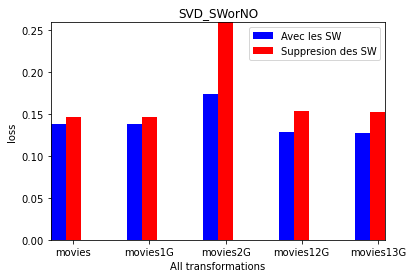

In [61]:
plt.figure()
ax = plt.subplot(111)
ax.bar(x-0.2, valueSVDwithSW, width=0.2, color='b', align='center', label="Avec les SW")
ax.bar(x, valueSVDwithoutSW, width=0.2, color='r', align='center', label="Suppresion des SW")
ax.set_xlabel('All transformations', fontsize=10)
ax.set_ylabel('loss', fontsize=10)
plt.title('SVD_SWorNO')
plt.xticks(x,transf)
plt.legend()
plt.legend(bbox_to_anchor=(1, 1))
ax.autoscale(tight=True)
plt.savefig('SVD_SWorNO.png')

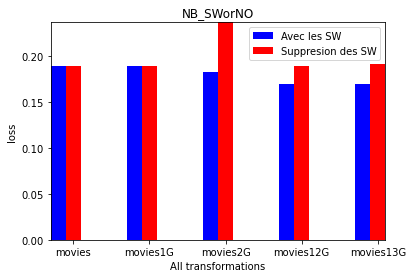

In [62]:
plt.figure()
ax = plt.subplot(111)
ax.bar(x-0.2, valueNBwithSW, width=0.2, color='b', align='center', label="Avec les SW")
ax.bar(x, valueNBwithoutSW, width=0.2, color='r', align='center', label="Suppresion des SW")
ax.set_xlabel('All transformations', fontsize=10)
ax.set_ylabel('loss', fontsize=10)
plt.xticks(x,transf)
plt.title('NB_SWorNO')
plt.legend()
plt.legend(bbox_to_anchor=(1, 1))
ax.autoscale(tight=True)
plt.savefig('NB_SWorNO.png')

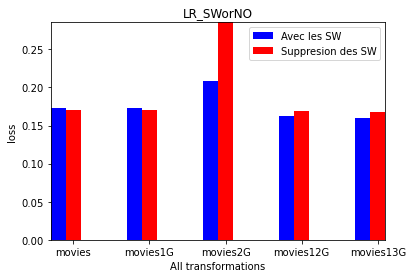

In [63]:
plt.figure()
ax = plt.subplot(111)
ax.bar(x-0.2, valueLRwithSW, width=0.2, color='b', align='center', label="Avec les SW")
ax.bar(x, valueLRwithoutSW, width=0.2, color='r', align='center', label="Suppresion des SW")
ax.set_xlabel('All transformations', fontsize=10)
ax.set_ylabel('loss', fontsize=10)
plt.xticks(x,transf)
plt.title('LR_SWorNO')
plt.legend()
plt.legend(bbox_to_anchor=(1, 1))
ax.autoscale(tight=True)
plt.savefig('LR_SWorNO.png')

On constate que la suppression des Stop Words ne permet pas d'ameliorer la classification, c'est meme moins bon.

### Train avec tout le dataset

In [ ]:
vec_movies = vectorizerTFIDF_movies1G.fit_transform(X_movies_transform)

In [ ]:
svcPredict = svm.LinearSVC(max_iter=10000, C=5)

In [ ]:
svcPredict.fit(vec_movies, y_movies)

In [ ]:
path = "./testSentiment.txt"
f = open(path,encoding="utf8")
sentiments_tests = np.array(f.readlines())

In [ ]:
transform_sentiments_test = transform(sentiments_tests,punc=True,accentMaj=True,nb=True)

In [ ]:
vec_sentiments_test = vectorizerTFIDF_movies1G.fit_transform(transform_sentiments_test)

In [ ]:
predicts = svcPredict.predict(vec_sentiments_test)

In [ ]:
with open('./predictSentiments.txt', 'w') as f:
    for p in predicts:
        f.write(str(p)+'\n')

In [ ]:
##################################################################

In [ ]:
#path =  "./movies1000/"
#alltxts,alllabs = load_movies(path)
#X = np.array(alltxts)
#Y = np.array(alllabs)

#X_final_vector = vectorizer_movies.fit_transform(X)
#svcPredict.fit(X_final_vector, Y)

#path = "./testSentiment.txt"
#f = open(path,encoding="utf8")
#X_test_final = np.array(f.readlines())
#X_test_vector = vectorizer_movies.transform(X_test_final)
#final_pred_svc = svcPredict.predict(X_test_vector)

In [ ]:
predTrue = []
with open('./message.txt', 'r') as f:
    lines = lines = [line.rstrip('\n') for line in f]
    for l in lines:
        predTrue.append(int(l))